In [3]:
import pandas as pd

# Load each season's file
df_2020 = pd.read_csv("C:/Users/ADMIN/Downloads/PL season 2021.csv")
df_2021 = pd.read_csv("C:/Users/ADMIN/Downloads/Pl Season 2122.csv")
df_2022 = pd.read_csv("C:/Users/ADMIN/Downloads/PL Season 2223.csv")
df_2023 = pd.read_csv("C:/Users/ADMIN/Downloads/PL Season 2324.csv")
df_2024 = pd.read_csv("C:/Users/ADMIN/Downloads/PL Season 2425.csv")
df_2025 = pd.read_csv("C:/Users/ADMIN/Downloads/PL Season 2526.csv")

# Add Season column to each
df_2021['Season'] = 2021
df_2022['Season'] = 2022
df_2023['Season'] = 2023
df_2024['Season'] = 2024
df_2025['Season'] = 2025

In [4]:
# Merge all into one DataFrame
df_combined = pd.concat([df_2021, df_2022, df_2023, df_2024, df_2025], ignore_index=True)

# Preview
print(df_combined.head())
print(df_combined['Season'].value_counts())

  Div        Date   Time    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  13/08/2021  20:00   Brentford         Arsenal     2     0   H     1   
1  E0  14/08/2021  12:30  Man United           Leeds     5     1   H     1   
2  E0  14/08/2021  15:00     Burnley        Brighton     1     2   A     1   
3  E0  14/08/2021  15:00     Chelsea  Crystal Palace     3     0   H     2   
4  E0  14/08/2021  15:00     Everton     Southampton     3     1   H     0   

   HTAG  ... BMGMCA BVCH  BVCD  BVCA  CLCH  CLCD  CLCA  LBCH  LBCD  LBCA  
0     0  ...    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1     0  ...    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2     0  ...    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3     0  ...    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4     1  ...    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 163 columns]
Season
2021    380
2022    380
2023    380
2024    380
20

In [11]:
# Check basic info
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Columns: 163 entries, Div to LBCA
dtypes: float64(138), int64(17), object(8)
memory usage: 2.0+ MB
None


In [52]:
# Dictionary mapping column names to full meanings
column_meanings = {
    'HomeTeam': 'Team playing at their home stadium',
    'AwayTeam': 'Team playing away from home',
    'Team': 'Generic team label—can refer to either HomeTeam or AwayTeam depending on context',
    'FTHG': 'Full Time Home Goals – goals scored by the home team',
    'FTAG': 'Full Time Away Goals – goals scored by the away team',
    'FTR': 'Full Time Result – H = Home Win, D = Draw, A = Away Win',
    'Date': 'Date of the match',
    'Venue': 'Stadium where the match was played',
    'Referee': 'Match official',
    'xG': 'Expected Goals – probability-based scoring metric',
    'Attendance': 'Number of spectators at the match',
    'Points': 'Total points earned by the team in the season',
    'GoalDifference': 'Goals scored minus goals conceded',
    'WinProbability': 'Model-estimated probability of winning the league'
}

# Example: print full meaning of a column
print(column_meanings['FTHG'])

Full Time Home Goals – goals scored by the home team


In [13]:
print(df_combined.columns.tolist())

['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'Season', 'BFH', 'BFD', 'BFA', '1XBH', '1XBD', '1XBA', 'BFEH', 'BFED', 'BFEA',

In [53]:
print(df_combined.isnull().sum())

Div               0
Date              0
Time              0
HomeTeam          0
AwayTeam          0
                 ..
Points            0
GoalDifference    0
GoalsFor          0
GoalsAgainst      0
Winner            0
Length: 158, dtype: int64


In [24]:
# Drop columns only if they exist in the DataFrame
columns_to_drop = ['CLCD', 'CLCA', 'LBCH', 'LBCD', 'LBCA' , 'BMGMCA', 'BVCH', 'BVCD', 'BVCA', 'CLCH', ]
df_combined.drop(columns=[col for col in columns_to_drop if col in df_combined.columns], inplace=True)

In [26]:
# Recheck info after dropping columns
print(df_combined.info())
print(df_combined.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Columns: 153 entries, Div to BMGMCD
dtypes: float64(128), int64(17), object(8)
memory usage: 1.8+ MB
None
Div            0
Date           0
Time           0
HomeTeam       0
AwayTeam       0
            ... 
BFDCH       1520
BFDCD       1520
BFDCA       1520
BMGMCH      1520
BMGMCD      1520
Length: 153, dtype: int64


In [28]:
# Summary statistics
print(df_combined.describe())

              FTHG         FTAG         HTHG         HTAG           HS  \
count  1580.000000  1580.000000  1580.000000  1580.000000  1580.000000   
mean      1.609494     1.348101     0.728481     0.591772    14.172785   
std       1.348669     1.228886     0.860254     0.800448     5.791492   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000     0.000000     0.000000     0.000000    10.000000   
50%       1.000000     1.000000     1.000000     0.000000    14.000000   
75%       2.000000     2.000000     1.000000     1.000000    18.000000   
max       9.000000     8.000000     5.000000     5.000000    36.000000   

                AS          HST          AST           HF           AF  ...  \
count  1580.000000  1580.000000  1580.000000  1580.000000  1580.000000  ...   
mean     11.809494     4.936709     4.148101    10.558861    10.937342  ...   
std       5.280939     2.614287     2.416607     3.461681     3.607992  ...   
min       1.00000

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [ ]:

# Label each season
df_2021['Season'] = 2021
df_2022['Season'] = 2022
df_2023['Season'] = 2023
df_2024['Season'] = 2024
df_2025['Season'] = 2025  # Ongoing 2025/2026 season

# Aggregation function for team-level stats
def aggregate_team_stats(df):
    # Goals scored
    home_goals = df.groupby('HomeTeam')['FTHG'].sum()
    away_goals = df.groupby('AwayTeam')['FTAG'].sum()
    goals_for = home_goals.add(away_goals, fill_value=0)

    # Goals conceded
    home_conceded = df.groupby('HomeTeam')['FTAG'].sum()
    away_conceded = df.groupby('AwayTeam')['FTHG'].sum()
    goals_against = home_conceded.add(away_conceded, fill_value=0)

    # Match result
    df['FTR'] = df.apply(lambda row: 'H' if row['FTHG'] > row['FTAG'] else ('A' if row['FTHG'] < row['FTAG'] else 'D'), axis=1)

    # Points
    df['HomePoints'] = df['FTR'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0))
    df['AwayPoints'] = df['FTR'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0))
    home_points = df.groupby('HomeTeam')['HomePoints'].sum()
    away_points = df.groupby('AwayTeam')['AwayPoints'].sum()
    points = home_points.add(away_points, fill_value=0)

    # Matches played
    home_matches = df['HomeTeam'].value_counts()
    away_matches = df['AwayTeam'].value_counts()
    matches_played = home_matches.add(away_matches, fill_value=0)

    # Combine stats
    team_stats = pd.DataFrame({
        'GoalsFor': goals_for,
        'GoalsAgainst': goals_against,
        'Points': points,
        'MatchesPlayed': matches_played
    })

    # Feature engineering
    team_stats['AvgGoalsFor'] = team_stats['GoalsFor'] / team_stats['MatchesPlayed']
    team_stats['AvgGoalsAgainst'] = team_stats['GoalsAgainst'] / team_stats['MatchesPlayed']
    team_stats['WinRate'] = team_stats['Points'] / (team_stats['MatchesPlayed'] * 3)

    return team_stats

#Aggregate each season separately
def prepare_season_stats(df_season, season_year):
    stats = aggregate_team_stats(df_season)
    stats['Season'] = season_year
    return stats

train_seasons = [df_2021, df_2022, df_2023, df_2024]
train_years = [2021, 2022, 2023, 2024]

season_stats_list = [prepare_season_stats(df, year) for df, year in zip(train_seasons, train_years)]
team_stats_train = pd.concat(season_stats_list, ignore_index=True)

# Step 4: Train regression model
features = ['AvgGoalsFor', 'AvgGoalsAgainst', 'WinRate']
X_train = team_stats_train[features]
y_train = team_stats_train['Points']

model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict for 2025/2026
team_stats_2025 = aggregate_team_stats(df_2025)
X_new = team_stats_2025[features]
team_stats_2025['PredictedPoints'] = model.predict(X_new)

# Step 6: Rank teams
result = team_stats_2025[['GoalsFor', 'GoalsAgainst', 'Points', 'PredictedPoints']]
result = result.sort_values(by='PredictedPoints', ascending=False)
print(result)

                GoalsFor  GoalsAgainst  Points  PredictedPoints
Liverpool             12             7      15        78.403221
Arsenal               12             3      13        76.219711
Crystal Palace         8             3      12        76.135651
Tottenham             11             4      11        69.379486
Sunderland             7             4      11        69.338852
Bournemouth            8             7      11        68.986984
Man City              14             6      10        67.552681
Everton                7             6       8        49.020428
Chelsea               11             8       8        49.008194
Brighton               9             9       8        49.000549
Leeds                  6             9       8        48.999805
Fulham                 7             8       8        48.999805
Brentford              9            11       7        43.973530
Man United             7            11       7        43.972786
Aston Villa            4             6  

In [95]:
# Predict for 2024
team_stats_2024 = aggregate_team_stats(df_2024)
X_2024 = team_stats_2024[features]
team_stats_2024['PredictedPoints'] = model.predict(X_2024)

# Compare predicted vs actual
comparison = team_stats_2024[['Points', 'PredictedPoints']]
print(comparison)

                Points  PredictedPoints
Arsenal             74        73.975380
Aston Villa         66        65.989647
Bournemouth         56        55.997887
Brentford           56        55.999001
Brighton            61        60.996433
Chelsea             69        68.989502
Crystal Palace      53        52.998783
Everton             48        48.000134
Fulham              54        53.999805
Ipswich             22        22.021776
Leicester           25        24.998951
Liverpool           84        83.994980
Man City            71        70.991409
Man United          42        41.999599
Newcastle           66        65.993736
Nott'm Forest       65        64.998215
Southampton         12        12.207199
Tottenham           38        38.004616
West Ham            43        43.003777
Wolves              42        42.000343


In [96]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(comparison['Points'], comparison['PredictedPoints'])
r2 = r2_score(comparison['Points'], comparison['PredictedPoints'])

print(f"MAE: {mae:.2f}, R² Score: {r2:.2f}")

MAE: 0.02, R² Score: 1.00


In [97]:
comparison['Residual'] = comparison['Points'] - comparison['PredictedPoints']
print(comparison.sort_values(by='Residual'))

                Points  PredictedPoints  Residual
Southampton         12        12.207199 -0.207199
Ipswich             22        22.021776 -0.021776
Tottenham           38        38.004616 -0.004616
West Ham            43        43.003777 -0.003777
Wolves              42        42.000343 -0.000343
Everton             48        48.000134 -0.000134
Fulham              54        53.999805  0.000195
Man United          42        41.999599  0.000401
Brentford           56        55.999001  0.000999
Leicester           25        24.998951  0.001049
Crystal Palace      53        52.998783  0.001217
Nott'm Forest       65        64.998215  0.001785
Bournemouth         56        55.997887  0.002113
Brighton            61        60.996433  0.003567
Liverpool           84        83.994980  0.005020
Newcastle           66        65.993736  0.006264
Man City            71        70.991409  0.008591
Aston Villa         66        65.989647  0.010353
Chelsea             69        68.989502  0.010498


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6480\1132429858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison['Residual'] = comparison['Points'] - comparison['PredictedPoints']


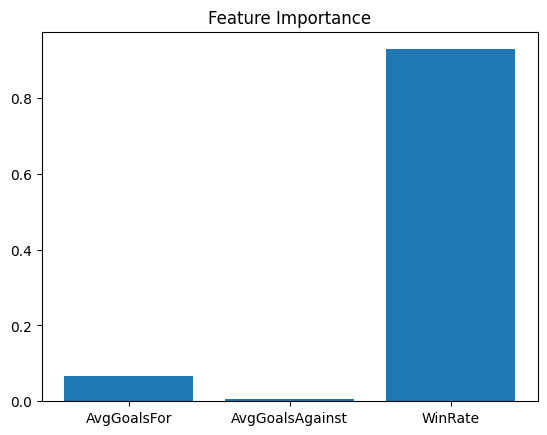

In [98]:
import matplotlib.pyplot as plt

XGBRegressor().fit(X_train, y_train)
model.feature_importances_
plt.bar(features, model.feature_importances_)
plt.title("Feature Importance")
plt.show()